In [1]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error
import xgboost as xgb
from sklearn.metrics import accuracy_score
import numpy as np
from sklearn.ensemble import IsolationForest
from sklearn.model_selection import cross_val_score, KFold
RANDOMSTATE=42
from sklearn.metrics import mean_absolute_error
import graphviz
from xgboost.sklearn import XGBRegressor

#  Import and read the charity_data.csv.
batter_woba_df = pd.read_csv("Resources/off_output_for_learning(copy).csv")
batter_woba_df.head()

,IDfg,Name,Age,G,AB,PA,H,1B,2B,3B,...,Events,CStr%,CSW%,xBA,xSLG,xwOBA,L-WAR,avg_wOBA,wOBA_2023,zscore_difference
0,1744,Miguel Cabrera,37.666667,126.000000,454.000000,502.666667,120.333333,94.000000,15.666667,0.000000,...,351.333333,0.152667,0.268000,0.246000,0.395667,0.307000,-0.766667,0.299333,0.293,0.055586
1,2136,David Peralta,32.666667,127.666667,436.000000,483.666667,113.666667,68.666667,29.666667,4.666667,...,341.333333,0.157000,0.266333,0.246000,0.374333,0.303333,1.266667,0.322333,0.311,-0.189938
2,2396,Carlos Santana,34.666667,149.000000,523.000000,617.000000,123.000000,77.666667,21.000000,0.333333,...,426.666667,0.166333,0.249000,0.254333,0.446333,0.351333,1.766667,0.327333,0.307,-0.449445
3,2434,Nelson Cruz,39.666667,128.000000,471.666667,537.333333,127.333333,78.333333,21.000000,0.333333,...,354.000000,0.127333,0.271667,0.265000,0.516000,0.366000,1.800000,0.351667,0.291,-1.622077
4,2967,Tommy Pham,32.666667,148.000000,532.000000,612.333333,131.666667,85.666667,26.666667,1.666667,...,396.000000,0.204333,0.289000,0.253667,0.425333,0.338333,1.733333,0.323667,0.343,0.602240


In [2]:
# Drop the 'Name', IDfg, 'zscore_difference' so it is not part of the regression.
batter_woba_reg = batter_woba_df.copy()
batter_woba_reg.drop(['Name', 'IDfg', 'wOBA_2023'], axis=1, inplace=True)
batter_woba_reg.head()

,Age,G,AB,PA,H,1B,2B,3B,HR,R,...,HardHit%,Events,CStr%,CSW%,xBA,xSLG,xwOBA,L-WAR,avg_wOBA,zscore_difference
0,37.666667,126.000000,454.000000,502.666667,120.333333,94.000000,15.666667,0.000000,10.666667,38.0,...,0.438667,351.333333,0.152667,0.268000,0.246000,0.395667,0.307000,-0.766667,0.299333,0.055586
1,32.666667,127.666667,436.000000,483.666667,113.666667,68.666667,29.666667,4.666667,10.666667,48.0,...,0.422000,341.333333,0.157000,0.266333,0.246000,0.374333,0.303333,1.266667,0.322333,-0.189938
2,34.666667,149.000000,523.000000,617.000000,123.000000,77.666667,21.000000,0.333333,24.000000,76.0,...,0.438667,426.666667,0.166333,0.249000,0.254333,0.446333,0.351333,1.766667,0.327333,-0.449445
3,39.666667,128.000000,471.666667,537.333333,127.333333,78.333333,21.000000,0.333333,27.666667,70.0,...,0.497000,354.000000,0.127333,0.271667,0.265000,0.516000,0.366000,1.800000,0.351667,-1.622077
4,32.666667,148.000000,532.000000,612.333333,131.666667,85.666667,26.666667,1.666667,17.666667,80.0,...,0.466000,396.000000,0.204333,0.289000,0.253667,0.425333,0.338333,1.733333,0.323667,0.602240


In [3]:
columns_to_keep_reg = ['Age', 'H', 'HR', 'RBI','BB', 'SO', 'SB', 'WAR', 'BB%', 'K%',
                  'BB/K', 'OPS', 'BABIP', 'Spd', 'wRC+', 'Swing%', 'Z-Contact%', 
                   'AVG+', 'OBP+', 'SLG+', 'HardHit%', 'xBA', 'avg_wOBA', 'zscore_difference']

batter_woba_reg = batter_woba_reg[columns_to_keep_reg]
batter_woba_reg.head()

# #'HR', 'RBI',

,Age,H,HR,RBI,BB,SO,SB,WAR,BB%,K%,...,wRC+,Swing%,Z-Contact%,AVG+,OBP+,SLG+,HardHit%,xBA,avg_wOBA,zscore_difference
0,37.666667,120.333333,10.666667,59.000000,38.666667,109.000000,0.333333,-0.866667,0.076000,0.218000,...,90.000000,0.497000,0.853333,106.666667,102.000000,88.000000,0.438667,0.246000,0.299333,0.055586
1,32.666667,113.666667,10.666667,59.666667,40.666667,97.666667,1.000000,1.566667,0.084333,0.203333,...,101.333333,0.490333,0.881667,104.666667,101.666667,101.666667,0.422000,0.246000,0.322333,-0.189938
2,34.666667,123.000000,24.000000,74.000000,88.333333,99.333333,2.000000,1.766667,0.142667,0.162000,...,107.333333,0.417667,0.864333,93.666667,108.666667,98.333333,0.438667,0.254333,0.327333,-0.449445
3,39.666667,127.333333,27.666667,86.000000,52.000000,125.333333,2.333333,1.833333,0.097000,0.234000,...,124.000000,0.492667,0.808333,108.666667,109.000000,116.666667,0.497000,0.265000,0.351667,-1.622077
4,32.666667,131.666667,17.666667,60.000000,71.666667,139.333333,15.666667,1.566667,0.117667,0.228000,...,104.666667,0.395333,0.873667,99.000000,106.000000,95.666667,0.466000,0.253667,0.323667,0.602240


In [4]:
# Split our preprocessed data into our features and target arrays
X = batter_woba_reg .drop('zscore_difference', axis=1)  # Features (remove the target column)
y = batter_woba_reg ['zscore_difference']              # Target

# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the shapes of the training and testing datasets
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (243, 23)
X_test shape: (61, 23)
y_train shape: (243,)
y_test shape: (61,)


In [5]:
# Create a StandardScaler instance
scaler = StandardScaler()

# Fit the StandardScaler on the training data
X_scaler = scaler.fit(X_train)

# Scale the training and test data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

print("Selected X_train shape:", X_train_scaled.shape)
print("Selected X_test shape:", X_test_scaled.shape)
print("Selected y_train shape:", y_train.shape)

Selected X_train shape: (243, 23)
Selected X_test shape: (61, 23)
Selected y_train shape: (243,)


In [6]:
# def tuning(xtrain, ytrain, name):
#     """Function to build XGBoost models and tune hyperparameters in multiple steps."""

#     # Reset default hyperparameters
#     param_dict = {'n_estimators':500, 'learning_rate':0.01, 'max_depth':5, 'subsample':0.4, 'colsample_bytree':0.3}
    
#     # Define and train base model
#     base_model = xgb.XGBRegressor(eval_metric='rmse', **param_dict, verbosity=0)
#     print(base_model)
#     base_model.fit(xtrain, ytrain)
#     score = base_model.score(xtrain, ytrain)   
#     print("Training score: ", score) 

#     # Cross-validatation 
#     scores = -cross_val_score(base_model, xtrain, ytrain, cv=5, scoring='neg_mean_absolute_error')
#     print("Mean cross-validation score: %.2f" % scores.mean())

#     kfold = KFold(n_splits=10, shuffle=True, random_state=RANDOMSTATE)
#     kf_cv_scores = -cross_val_score(base_model, xtrain, ytrain, cv=kfold, scoring='neg_mean_absolute_error')
#     print("K-fold CV average score: %.2f" % kf_cv_scores.mean())

#     # Predict test data with base model
#     base_ypred = base_model.predict(X_test)
#     base_mae = mean_absolute_error(y_test, base_ypred)
#     base_mse = mean_squared_error(y_test, base_ypred)
#     print("MAE: %.2f" % base_mae)
#     print("MSE: %.2f" % base_mse)
#     print("RMSE: %.2f" % (base_mse**(1/2.0)))

#     # Plot model performance
#     x_ax = range(len(y_test))
#     plt.scatter(x_ax, y_test, s=5, color="blue", label="actual")
#     plt.plot(x_ax, base_ypred, lw=0.8, color="red", label="predicted")
#     plt.legend()
#     plt.show()

#     # Display and save feature importance chart
#     xgb.plot_importance(base_model, max_num_features = 15)
#     plt.tight_layout()
#     plt.savefig('base_'+name+'_1619.png')
#     plt.show()
    
#     # Display one decision tree
#     fig, ax = plt.subplots(figsize=(30, 30))
#     xgb.plot_tree(base_model, num_trees=20, rankdir='LR', ax=ax)
#     plt.show()

#     # Hyperparameter grid search step 1: max depth
#     model = xgb.XGBRegressor(eval_metric='rmse', **param_dict)
#     print(model)
#     max_depth = range(3, 9, 1)
#     param_grid = dict(max_depth=max_depth)
#     kfold = KFold(n_splits=10, shuffle=True, random_state=RANDOMSTATE)
#     grid_search = GridSearchCV(model, param_grid, scoring='neg_mean_absolute_error', n_jobs=-1, cv=kfold, verbose=1)
#     grid_result = grid_search.fit(xtrain, ytrain)
#     param_dict['max_depth'] = grid_result.best_params_['max_depth']
#     print(grid_result.best_score_, grid_result.best_params_)

#     # Hyperparameter grid search step 2: subsample, colsample_bytree
#     model2 = xgb.XGBRegressor(eval_metric='rmse', **param_dict)
#     print(model2)
#     subsample = np.linspace(0.4, 1.0, 7)
#     colsample_bytree = np.linspace(0.1, 0.35, 6)
#     param_grid = dict(subsample=subsample, colsample_bytree=colsample_bytree, max_depth=[grid_result.best_params_['max_depth']])
#     kfold = KFold(n_splits=10, shuffle=True, random_state=RANDOMSTATE)
#     grid_search = GridSearchCV(model2, param_grid, scoring='neg_mean_absolute_error', n_jobs=-1, cv=kfold, verbose=1)
#     grid_result = grid_search.fit(xtrain, ytrain)
#     param_dict['subsample'] = grid_result.best_params_['subsample']
#     param_dict['colsample_bytree'] = grid_result.best_params_['colsample_bytree']
#     print(grid_result.best_score_, grid_result.best_params_)

#     # Hyperparameter grid search step 3: learning rate
#     model3 = xgb.XGBRegressor(eval_metric='rmse', **param_dict)
#     print(model3)
#     learning_rate = [0.0001, 0.001, 0.01, 0.1]
#     param_grid = dict(learning_rate=learning_rate, subsample=[grid_result.best_params_['subsample']], 
#                       colsample_bytree=[grid_result.best_params_['colsample_bytree']], 
#                       max_depth=[grid_result.best_params_['max_depth']])
#     kfold = KFold(n_splits=10, shuffle=True, random_state=RANDOMSTATE)
#     grid_search = GridSearchCV(model3, param_grid, scoring='neg_mean_absolute_error', n_jobs=-1, cv=kfold, verbose=1)
#     grid_result = grid_search.fit(xtrain, ytrain)
#     param_dict['learning_rate'] = grid_result.best_params_['learning_rate']
#     print(grid_result.best_score_, grid_result.best_params_)

#     # Hyperparameter grid search step 4: number of estimators
#     model4 = xgb.XGBRegressor(eval_metric='rmse', **param_dict)
#     print(model4)
#     n_estimators = [100, 200, 300, 400, 500]
#     param_grid = dict(n_estimators=n_estimators, learning_rate=[grid_result.best_params_['learning_rate']], 
#                       subsample=[grid_result.best_params_['subsample']], 
#                       colsample_bytree=[grid_result.best_params_['colsample_bytree']], 
#                       max_depth=[grid_result.best_params_['max_depth']])
#     kfold = KFold(n_splits=10, shuffle=True, random_state=RANDOMSTATE)
#     grid_search = GridSearchCV(model4, param_grid, scoring='neg_mean_absolute_error', n_jobs=-1, cv=kfold, verbose=1)
#     grid_result = grid_search.fit(xtrain, ytrain)
#     param_dict['n_estimators'] = grid_result.best_params_['n_estimators']
#     best_params_list.append(param_dict)
#     print(grid_result.best_score_, grid_result.best_params_)
    
#     # Train best parameter model    
#     model5 = xgb.XGBRegressor(eval_metric='rmse', **param_dict)
#     model5.fit(xtrain, ytrain)

#     score = model5.score(xtrain, ytrain)   
#     print("Training score: ", score) 

#     # Cross-validataion 
#     scores = -cross_val_score(model5, xtrain, ytrain, cv=5, scoring='neg_mean_absolute_error')
#     print("Mean cross-validation score: %.2f" % scores.mean())

#     kfold = KFold(n_splits=10, shuffle=True, random_state=RANDOMSTATE)
#     kf_cv_scores = -cross_val_score(model5, xtrain, ytrain, cv=kfold, scoring='neg_mean_absolute_error')
#     print("K-fold CV average score: %.2f" % kf_cv_scores.mean())

#     # Predict test set
#     ypred = model5.predict(X_test_scaled)
#     mae = mean_absolute_error(y_test, ypred)
#     mse = mean_squared_error(y_test, ypred)
#     print("MAE: %.2f" % mae)
#     print("MSE: %.2f" % mse)
#     print("RMSE: %.2f" % (mse**(1/2.0)))

#     # Plot model performance
#     x_ax = range(len(y_test))
#     plt.scatter(x_ax, y_test, s=5, color="blue", label="actual")
#     plt.plot(x_ax, ypred, lw=0.8, color="red", label="predicted")
#     plt.legend()
#     plt.show()

#     # Save model
#     joblib.dump(model5, name+"_1619.joblib.dat")
    
#     # Display feature importance table
#     xgb.plot_importance(model5, max_num_features = 15)
#     plt.tight_layout()
#     plt.savefig(name+'_1619.png')
#     plt.show()
    
#     # Display one decision tree
#     fig, ax = plt.subplots(figsize=(30, 30))
#     xgb.plot_tree(model5, num_trees=20, rankdir='LR', ax=ax)
#     plt.show()
    


In [7]:
# tuning(X_train_scaled, y_train, "wOBA")

In [8]:
# from sklearn.model_selection import GridSearchCV
# from sklearn.metrics import make_scorer, mean_squared_error

# # Define the parameter grid for hyperparameter tuning
# param_grid = {
#     'max_depth': [2, 4, 6, 8],
#     'learning_rate': [0.01, 0.1, 0.2, 0.3],
#     'n_estimators': [300, 400, 500, 600]
# #     'min_child_weight': [1, 5, 10, 15],
# #     'subsample': [0.8, 0.9, 1.0, 1.1],
# #     'colsample_bytree': [0.8, 0.9, 1.0, 1.1],
# #     'gamma': [0, 0.1, 0.2, 0.3],
# #     'reg_alpha': [0, 0.1, 0.5, 1.0],
# #     'reg_lambda': [0, 0.1, 0.5, 1.0]
# }
# # Create the XGBoost model
# xgb_model = XGBRegressor(objective='reg:squarederror', eval_metric='rmse')

# # Define RMSE as the scoring metric
# scorer = make_scorer(mean_squared_error, squared=False)

# # Create the GridSearchCV object
# grid_search = GridSearchCV(
#     estimator=xgb_model,
#     param_grid=param_grid,
#     scoring=scorer,
#     cv=5
# )

# # Fit the GridSearchCV object to the data
# grid_search.fit(X_train_scaled, y_train)

# # Get the best parameters and best estimator
# best_params = grid_search.best_params_
# best_estimator = grid_search.best_estimator_

# # Make predictions using the best estimator
# y_pred = best_estimator.predict(X_test_scaled)

# # Calculate RMSE
# rmse = np.sqrt(mean_squared_error(y_test, y_pred))
# print(f"Root Mean Squared Error with tuned parameters: {rmse}")

In [9]:
# Create the XGBoost model
xgb_model = XGBRegressor(
    objective='reg:squarederror',
    eval_metric='rmse',
    max_depth=2,
    learning_rate=0.01,
    n_estimators=500
)

# Train the XGBoost model
xgb_model.fit(X_train_scaled, y_train)

# Make predictions
y_pred = xgb_model.predict(X_test_scaled)

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"Root Mean Squared Error: {rmse}")

Root Mean Squared Error: 0.9247862629514946


In [10]:
from scipy.stats import pearsonr

pearsonr(y_test.values, y_pred)

PearsonRResult(statistic=0.5696598800512037, pvalue=1.6558090317143428e-06)

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

# # Get the indices of X_test_scaled
# indices_1 = np.arange(len(X_train_scaled))
# indices_2 = np.arange(len(X_test_scaled))


# # Create a scatter plot using indices as x-values
# plt.figure(figsize=(10, 6))
# plt.scatter(indices_1, y_train, alpha=0.5, label='Data Points')
# plt.title('Scatter Plot with Regression Line by Index Number')
# plt.xlabel('Index Number')
# plt.ylabel('wOBA_23')
# plt.legend()  # Show legend
# plt.tight_layout()
# plt.show()

In [12]:
# # Get the indices of X_test_scaled
# indices = range(len(X_test_scaled))

# # Create a scatter plot with actual y_test values and predicted y_pred values
# plt.figure(figsize=(10, 6))
# plt.scatter(indices, y_test, alpha=0.5, label='Actual', color='blue')
# plt.scatter(indices, y_pred, alpha=0.5, label='Predicted', color='red')
# plt.title('Scatter Plot of Actual vs. Predicted Values')
# plt.xlabel('Index Number')
# plt.ylabel('wOBA_23')
# plt.legend()  # Show legend
# plt.tight_layout()
# plt.show()

In [13]:
# # Get the indices of X_test_scaled
# # Get the indices of X_test_scaled

# # Create a scatter plot with actual y_test values and predicted y_pred values
# plt.figure(figsize=(10, 6))
# plt.scatter(y_test, y_pred, alpha=0.5, label='Predicted', color='blue')  # Corrected label
# plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', label='Ideal')
# plt.title('Scatter Plot of Predicted vs. Actual Values')
# plt.xlabel('Actual wOBA_23')
# plt.ylabel('Predicted wOBA_23')
# plt.legend()
# plt.tight_layout()
# plt.show()

In [14]:
import shap

explainer = shap.Explainer(xgb_model, X_train_scaled)

shap_values = explainer(X_test_scaled, check_additivity=False)

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


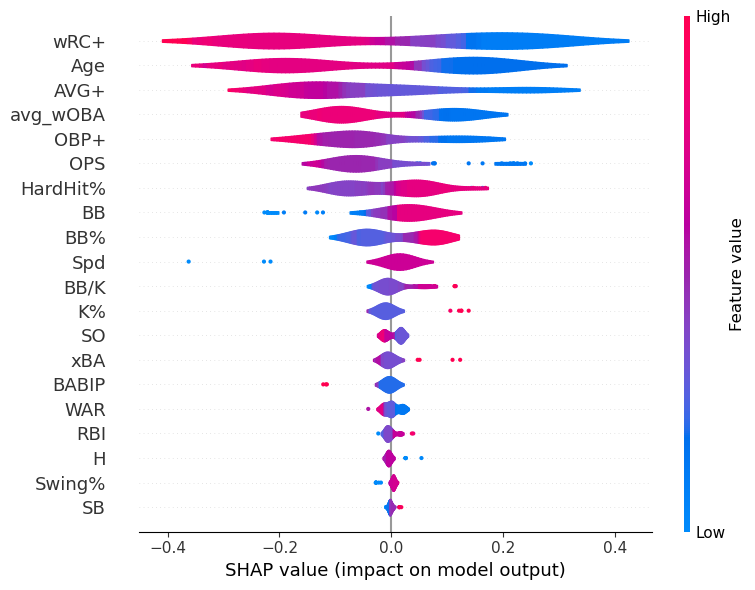

In [15]:
# Create a smaller plot
plt.figure(figsize=(8, 6))

# Generate SHAP summary plot with adjusted figsize
shap.summary_plot(shap_values, X_test_scaled, plot_type='violin', feature_names=X_train.columns, show=False)

# Get the current axes and adjust their size
ax = plt.gca()
ax.figure.set_size_inches(8, 6)
plt.savefig('Images/shap_woba_reg.png', bbox_inches='tight')
# Show the plot
plt.tight_layout()
plt.show()

In [16]:
from sklearn.ensemble import IsolationForest
import matplotlib.pyplot as plt

# Create the Isolation Forest model
iso_forest = IsolationForest(
    n_estimators=500,       # Number of isolation trees 
    contamination=0.15,     # Expected proportion of outliers
    max_features=1.0,       # Number of features for best split (between 0 and 1)
    bootstrap=False,        # Whether to use bootstrap samples
    random_state=None       # Random seed for reproducibility
)

# Fit the model
iso_forest.fit(X_train_scaled)

# Predict outliers using the trained model
outlier_predictions = iso_forest.predict(X_test_scaled)

# # Visualize the outlier predictions
# plt.scatter(range(len(X_test_scaled)), y_test, c=outlier_predictions, cmap='coolwarm')
# plt.xlabel('Data Point Index')
# plt.ylabel('Actual y-values')
# plt.title('Isolation Forest Outlier Predictions')
# plt.show()

In [17]:
# ensemble_predictions = (y_pred + outlier_predictions) / 2

In [18]:
# import matplotlib.pyplot as plt

# # Visualize the ensemble predictions
# plt.scatter(y_test, ensemble_predictions)
# plt.xlabel('True y-values')
# plt.ylabel('Ensemble Predictions')
# plt.title('Ensemble Predictions vs True y-values')
# plt.show()


In [19]:
# import matplotlib.pyplot as plt

# # Create a scatter plot of actual y-values against predicted y-values
# plt.scatter(y_test, ensemble_predictions, c='b', label='Inliers', alpha=0.5)
# plt.scatter(y_test[outlier_predictions == -1], ensemble_predictions[outlier_predictions == -1], c='r', label='Outliers', alpha=0.5)

# plt.xlabel('Actual y-values')
# plt.ylabel('Ensemble Predictions')
# plt.title('Isolation Forest Outlier Detection')
# plt.legend()
# plt.show()

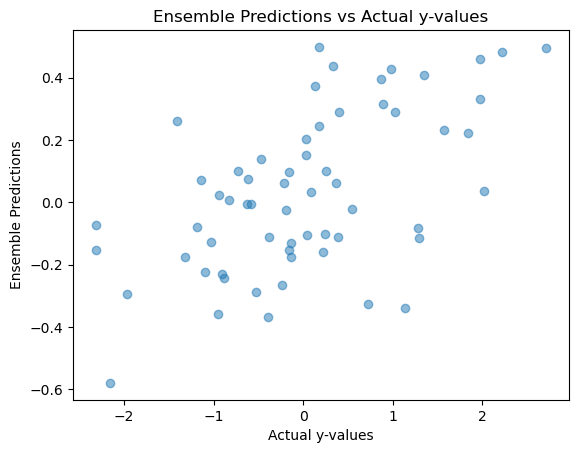

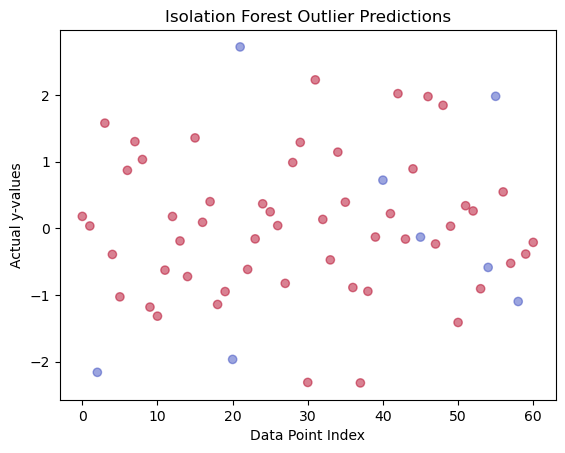

In [20]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, median_absolute_error
from sklearn.ensemble import VotingRegressor
import numpy as np

# Make predictions with XGBoost
y_pred_xgb = xgb_model.predict(X_test_scaled)

# Calculate ensemble predictions as weighted average
ensemble_predictions = (0.9 * y_pred_xgb + 0.1 * outlier_predictions) / 2

# Create a scatter plot to visualize actual y-values against ensemble predictions
plt.scatter(y_test, ensemble_predictions, alpha=0.5)
plt.xlabel('Actual y-values')
plt.ylabel('Ensemble Predictions')
plt.title('Ensemble Predictions vs Actual y-values')
plt.show()

# Visualize the effect of outliers
plt.scatter(range(len(y_test)), y_test, c=outlier_predictions, cmap='coolwarm', alpha=0.5)
plt.xlabel('Data Point Index')
plt.ylabel('Actual y-values')
plt.title('Isolation Forest Outlier Predictions')
plt.show()

In [21]:
pearsonr(y_test.values, ensemble_predictions)

PearsonRResult(statistic=0.5656438432986762, pvalue=2.032350023248528e-06)